In [13]:
import pandas as pd 
from math import sqrt
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import  KFold

In [14]:
data = pd.read_csv('../Data/ozone.csv', sep=',')
y = data["MaxO3"]
data= data[
           ['T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9',
            'Vx12', 'Vx15', 'MaxO3v']
]

def normalization(dataToNormalize):
    columns = dataToNormalize.columns
    for col in columns:
        x = dataToNormalize[[col]].values.astype(float)
        standard_normalization = preprocessing.StandardScaler()
        res = standard_normalization.fit_transform(x)
        dataToNormalize[col]=res
        
normalization(data)


In [20]:
def create_evaluate_model(index_fold, x_train, x_test,  y_train, y_test):
    polynomial_features = PolynomialFeatures(degree=4)
    poly_regression_alg = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", poly_regression_alg)])
    model.fit(x_train,y_train)
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    rmse = sqrt(mean_squared_error(y_test, test_predictions))
    r2 = r2_score(y_test, test_predictions)
    #print(f"Run {index_fold} : RMSE = {round(rmse,2)} - R2_score = {round(r2,2)}")
    return (rmse, r2,train_predictions,test_predictions)

In [23]:

index_fold = 0 
average_rmse = 0
average_r2 = 0
nb_simu = 100
for i in range(nb_simu):
    x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
    current_rmse, current_r2,train_predictions,test_predictions = create_evaluate_model(index_fold, x_train, x_test, y_train, y_test)
    average_rmse = average_rmse + current_rmse
    average_r2 = average_r2 + current_r2
    index_fold = index_fold + 1
    
average_rmse = average_rmse / nb_simu
average_r2 = average_r2 / nb_simu
#print(f"Moyenne : RMSE = {round(average_rmse,2)} - R2_score = {round(average_r2,2)}")

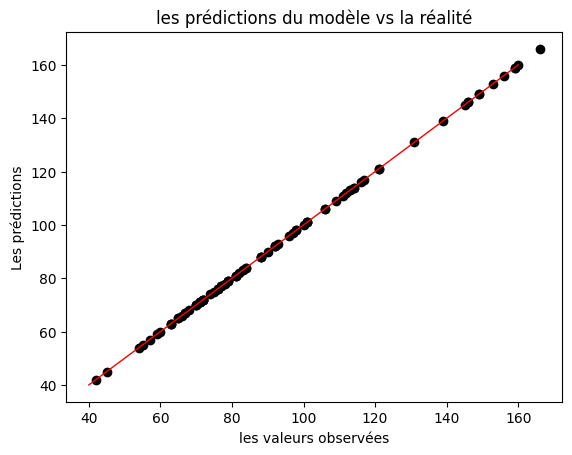

In [24]:
plt.scatter(y_train, train_predictions,  color='black')
plt.title("les prédictions du modèle vs la réalité")
plt.xlabel("les valeurs observées")
plt.ylabel("Les prédictions")
plt.plot([40.0, 160.0], [40.0, 160.0], 'red', lw=1)
plt.show()

In [25]:
print(f"RMSE = {round(sqrt(mean_squared_error(y_train, train_predictions)),2)}")
print(f"R2_score = {round(r2_score(y_train, train_predictions),2)}")

print(f"RMSE = {round(sqrt(mean_squared_error(y_test, test_predictions)),2)}")
print(f"R2_score = {round(r2_score(y_test, test_predictions),2)}")

RMSE = 0.0
R2_score = 1.0
RMSE = 29.87
R2_score = -1.83


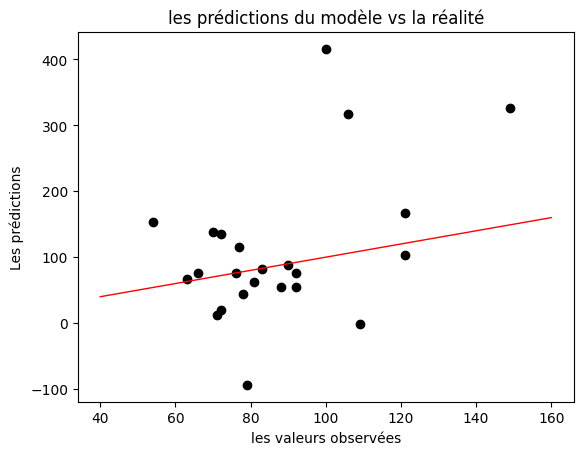

In [9]:
plt.scatter(y_test, test_predictions,  color='black')
plt.title("les prédictions du modèle vs la réalité")
plt.xlabel("les valeurs observées")
plt.ylabel("Les prédictions")
plt.plot([40.0, 160.0], [40.0, 160.0], 'red', lw=1)
plt.show()
 